## Exercise for graph II

Your task:
Create a graph where you pass a single list of integers along with a name and operation , if the operation is a "+ , you add the elements and if it is a "*" , you multiply the elemnet all withing the same node

inputs : {"name":"Jack Sparrow",  "values": [1,2,3,4]. "operation":"*"}
output :"Hi Jack Sparrow , your answer is 24"

In [2]:
from typing import List, TypedDict
from langgraph.graph import StateGraph

In [3]:
# create graph state
class AgentState(TypedDict):
    name:str
    values:List[int]
    operation: str
    result: str

    

In [4]:
# create graph node
import math
def operation_node(state:AgentState) -> AgentState:
    """ This function perform operation based in the state operation"""

    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is { math.prod(state['values'])}"
    else:
        state["result"] = f"Hi {state['name']}, your operation {state['operation']} is not supported"
    
    return state

    

In [6]:
# create graph 
garph  = StateGraph(AgentState)
garph.set_entry_point("operation_node")  # set entry node
garph.add_node("operation_node", operation_node)  # add node to the graph
garph.set_finish_point("operation_node")  # set finish node

app = garph.compile()  # compile the graph

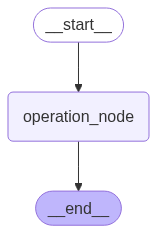

In [7]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))  # display the graph

In [10]:
output = app.invoke(AgentState(name="Jack Sparrow", values=[1, 2, 3, 4], operation="*"))  # invoke the app with initial state
print(output["result"] ) # retrieve the result

output = app.invoke(AgentState(name="Jack Sparrow", values=[1, 2, 3, 4], operation="+"))  # invoke the app with initial state
print(output["result"] ) # retrieve the result



Hi Jack Sparrow, your answer is 24
Hi Jack Sparrow, your answer is 10
